In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score,recall_score,classification_report
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('details.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [6]:
legal_transaction = data[data.Class == 0]
fraud_transaction = data[data.Class == 1]

In [7]:
print(legal_transaction.shape)
print(fraud_transaction.shape)
data.groupby('Class').mean()

(284315, 31)
(492, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [8]:
legal_sample = legal_transaction.sample(n=492*2)
legal_sample.shape

(984, 31)

In [9]:
new_dataset = pd.concat([legal_sample, fraud_transaction])

In [10]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
31732,36493.0,1.109179,-0.303951,1.325986,0.907733,-1.189265,-0.058374,-0.781501,0.264120,1.106027,...,-0.056307,-0.004960,0.114577,0.399754,0.091744,0.330653,0.024705,0.024698,11.50,0
93330,64358.0,-0.690725,0.706132,1.580405,-1.371194,-0.105032,-0.882639,1.032256,-0.249324,-0.162114,...,-0.031186,0.059434,-0.064558,0.582454,-0.377154,0.694344,-0.031903,-0.071581,39.38,0
184814,126401.0,1.795758,-2.305005,-1.202107,-1.071370,-1.469900,-0.185290,-0.815732,-0.140354,-0.651381,...,-0.391083,-0.999135,0.129649,0.704956,-0.253447,-0.379907,-0.032242,-0.004282,264.45,0
42659,41190.0,-1.237861,-4.888193,-0.283008,0.053461,-2.933032,-0.032820,0.707086,-0.172479,2.566942,...,0.656874,-0.587332,-1.170680,0.509660,-0.036018,-0.090514,-0.179552,0.244747,1280.00,0
68240,52895.0,0.991429,-0.620369,-0.484238,0.313528,1.464658,4.042002,-0.980805,1.035853,0.569773,...,0.142747,0.164532,-0.229214,1.025976,0.621787,-0.239862,0.047634,0.049956,125.00,0


In [11]:
new_dataset['Class'].value_counts()

Class
0    984
1    492
Name: count, dtype: int64

In [12]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93903.508130,-0.069797,-0.008700,0.043834,0.030616,0.050501,-0.003504,-0.003203,-0.000433,0.033681,...,0.025615,-0.015503,-0.007698,0.014825,-0.021125,0.004255,-0.014759,-0.028138,-0.000048,85.066463
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [13]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [14]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
31732    36493.0  1.109179 -0.303951  1.325986  0.907733 -1.189265 -0.058374   
93330    64358.0 -0.690725  0.706132  1.580405 -1.371194 -0.105032 -0.882639   
184814  126401.0  1.795758 -2.305005 -1.202107 -1.071370 -1.469900 -0.185290   
42659    41190.0 -1.237861 -4.888193 -0.283008  0.053461 -2.933032 -0.032820   
68240    52895.0  0.991429 -0.620369 -0.484238  0.313528  1.464658  4.042002   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [16]:
print(X.shape, X_train.shape, X_test.shape)

(1476, 30) (1180, 30) (296, 30)


In [17]:
model = SVC(kernel='linear', C=1, probability=True)

In [18]:
model.fit(X_train, Y_train)

SVC(C=1, kernel='linear', probability=True)

In [19]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [20]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9271186440677966


In [21]:
y_pred = model.predict(X_test)
SVC_test_data_accuracy = accuracy_score(Y_test,y_pred)
SVC_precision = precision_score(Y_test, y_pred)
SVC_f1 = f1_score(Y_test, y_pred)
SVC_recall = recall_score(Y_test,y_pred)
classification_rep = classification_report(Y_test, y_pred)


In [22]:
print("SVM : ")
print("Accuracy : ",SVC_test_data_accuracy)
print("Precision : ",SVC_precision)
print("F1 : ",SVC_f1)
print("Recall : ",SVC_recall)
print(f'Classification Report:\n{classification_rep}')

SVM : 
Accuracy :  0.9121621621621622
Precision :  0.9876543209876543
F1 :  0.8602150537634409
Recall :  0.7619047619047619
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.94       191
           1       0.99      0.76      0.86       105

    accuracy                           0.91       296
   macro avg       0.94      0.88      0.90       296
weighted avg       0.92      0.91      0.91       296



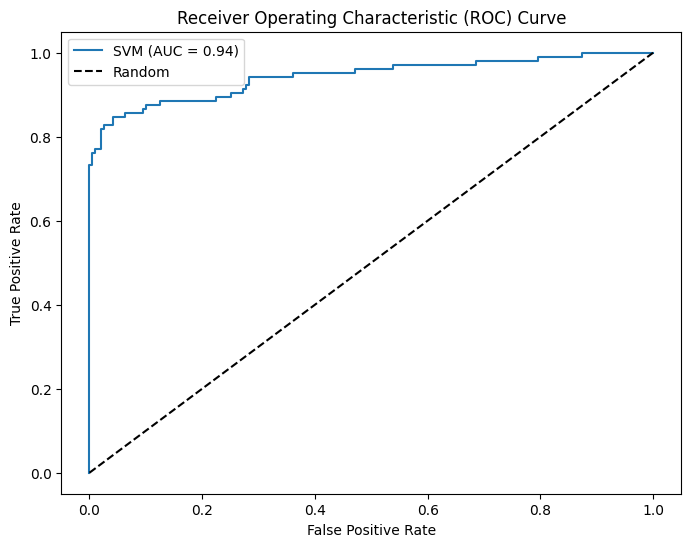

In [24]:

y_probabilities = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(Y_test, y_probabilities)
auc = roc_auc_score(Y_test, y_probabilities)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'SVM (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()